In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

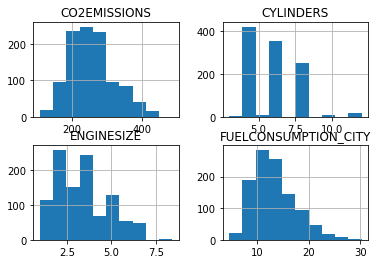

In [2]:
# MOSTRAR TABLA
df = pd.read_csv("./FuelConsumption.csv")

# TABLA DATASET 
df.head()

cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_COMB_MPG']]
cdf.head(19)

viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_CITY']]
viz.hist()
plt.show()


In [23]:
msk = np.random.rand(len(df)) < 0.82
train = cdf[msk]
test = cdf[~msk]

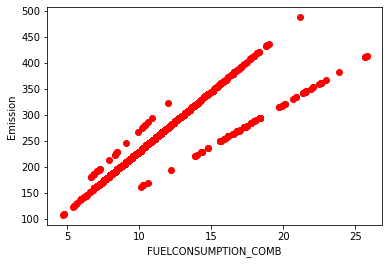

In [24]:
# GRÁFICO VARIABLES DEPENDIENTES E INDEPENDIENTES
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

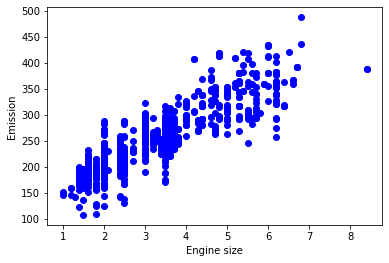

In [25]:
# GRÁFICO Y CALCULO VARIABLES DEPENDIENTES E INDEPENDIENTES
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

In [26]:
# CALCULO DE COEFICIENTE E INTERCEPCIÓN. Dependiente e Independiente
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[39.01738722]]
Intercept:  [126.05998845]


Text(0, 0.5, 'Emission')

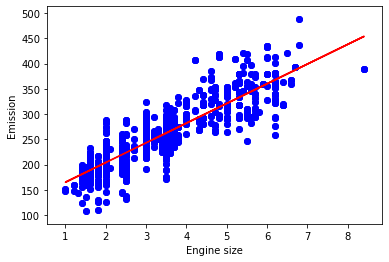

In [27]:
# TRASAR LÍNEA DE AJUSTE
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")


In [28]:
# CALCULO DE ERROR PORCENTUAL
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['CYLINDERS']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

Mean absolute error: 99.20
Residual sum of squares (MSE): 11199.45
R2-score: -1.19


In [29]:
# vamos a predicir y = regresion_lineal(5)
nuevo_x = np.array([3.5]) 
prediccion = regr.predict( nuevo_x.reshape(-1,1))

print("Predicción: : %.2f" % prediccion )
# resultado: [1.7449]

Predicción: : 262.62
